# **Judul : Prediksi Pasien Terkena Penyakit HIV (Human Immunodeficiency Virus) Dengan Implementasi Algoritma K-Nearest Neighbor (KNN) Studi Kasus: RSUD dr. Chasbullah Abdul madjid Kota Bekasi**

# **PENGUMPULAN DATA**

In [112]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
import seaborn as sns
%matplotlib inline

# **Data Loading**

In [113]:
# Load Data
data = pd.read_csv('Laporan_HIV_Encoded.csv')

# **DATA PREPROCESSING**

# **Data Exploration**

In [114]:
print("Distribusi awal Status ODHIV:")
print(data['Status ODHIV'].value_counts())
print("\nPersentase:")
print(data['Status ODHIV'].value_counts(normalize=True) * 100)

Distribusi awal Status ODHIV:
Status ODHIV
2    1562
1     631
0      12
Name: count, dtype: int64

Persentase:
Status ODHIV
2    70.839002
1    28.616780
0     0.544218
Name: proportion, dtype: float64


In [115]:
status_counts = data['Status ODHIV'].value_counts()
status_percentages = data['Status ODHIV'].value_counts(normalize=True) * 100

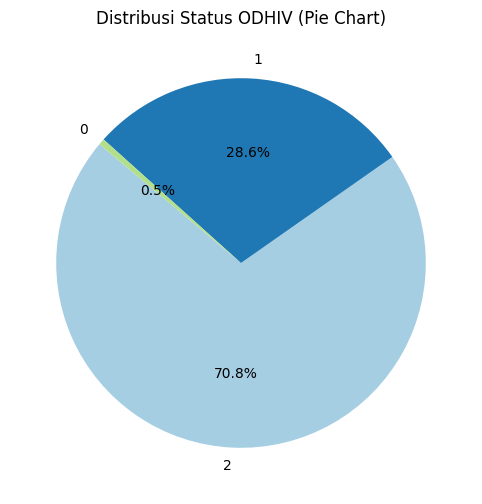

In [116]:
# Membuat Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(status_percentages, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Distribusi Status ODHIV (Pie Chart)")
plt.show()

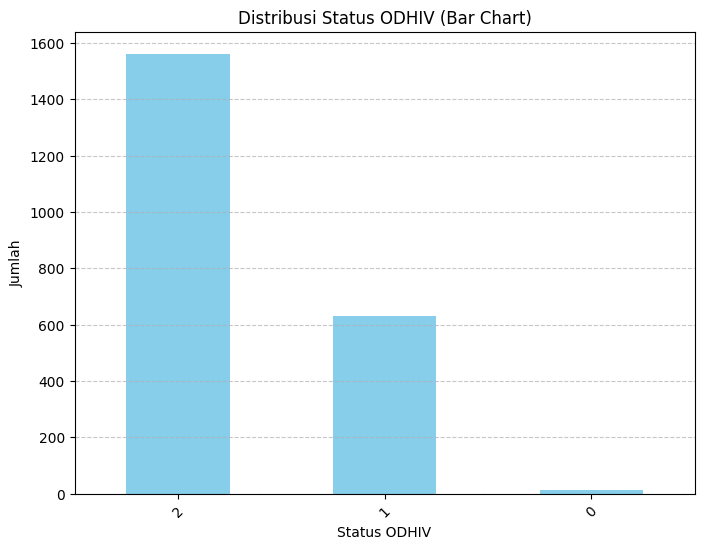

In [117]:
plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar', color='skyblue')
plt.title("Distribusi Status ODHIV (Bar Chart)")
plt.xlabel("Status ODHIV")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Pembahasan

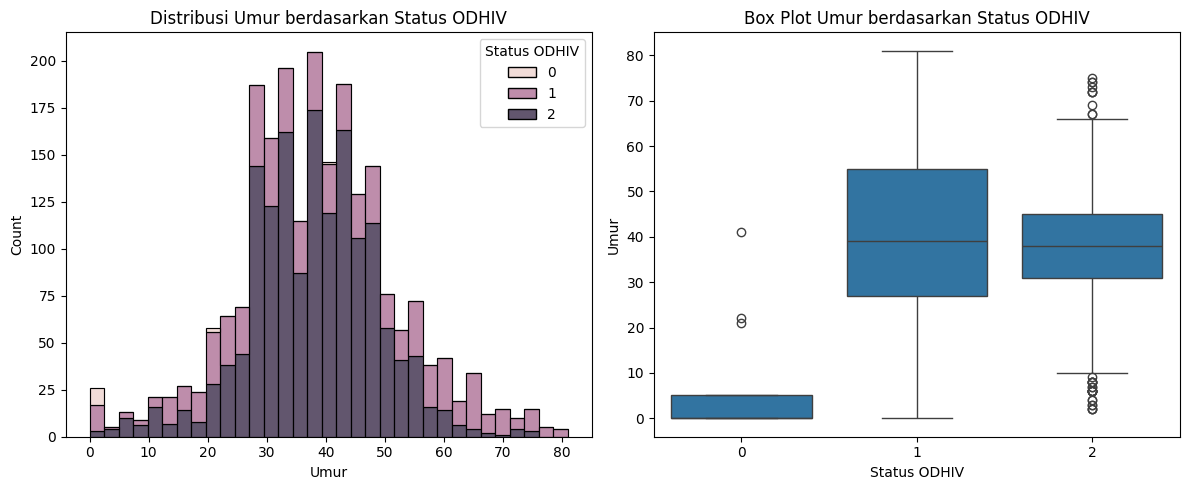

In [118]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='Umur', hue='Status ODHIV', multiple="stack")
plt.title('Distribusi Umur berdasarkan Status ODHIV')

plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Status ODHIV', y='Umur')
plt.title('Box Plot Umur berdasarkan Status ODHIV')
plt.tight_layout()
plt.show()

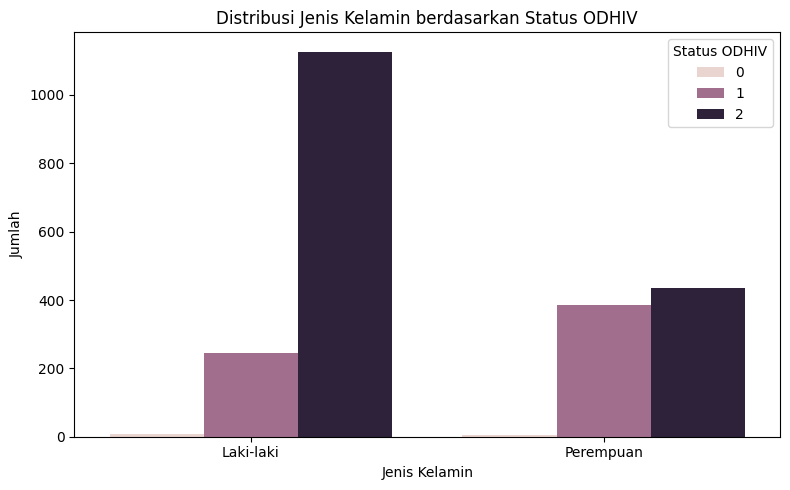

In [119]:
# Visualisasi distribusi Jenis Kelamin berdasarkan Status ODHIV
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Jenis Kelamin', hue='Status ODHIV')
plt.title('Distribusi Jenis Kelamin berdasarkan Status ODHIV')
plt.xticks([0, 1], ['Laki-laki', 'Perempuan'])
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.legend(title='Status ODHIV')
plt.tight_layout()
plt.show()

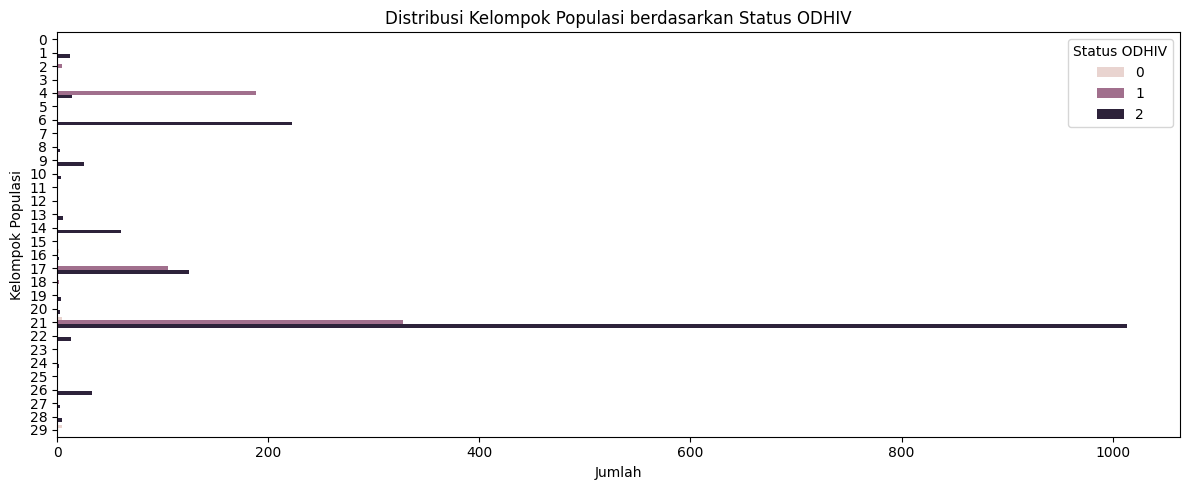

In [120]:
# Visualisasi Kelompok Populasi
plt.figure(figsize=(12, 5))
sns.countplot(data=data, y='Kelompok Populasi', hue='Status ODHIV')
plt.title('Distribusi Kelompok Populasi berdasarkan Status ODHIV')
plt.xlabel('Jumlah')
plt.ylabel('Kelompok Populasi')
plt.tight_layout()
plt.show()

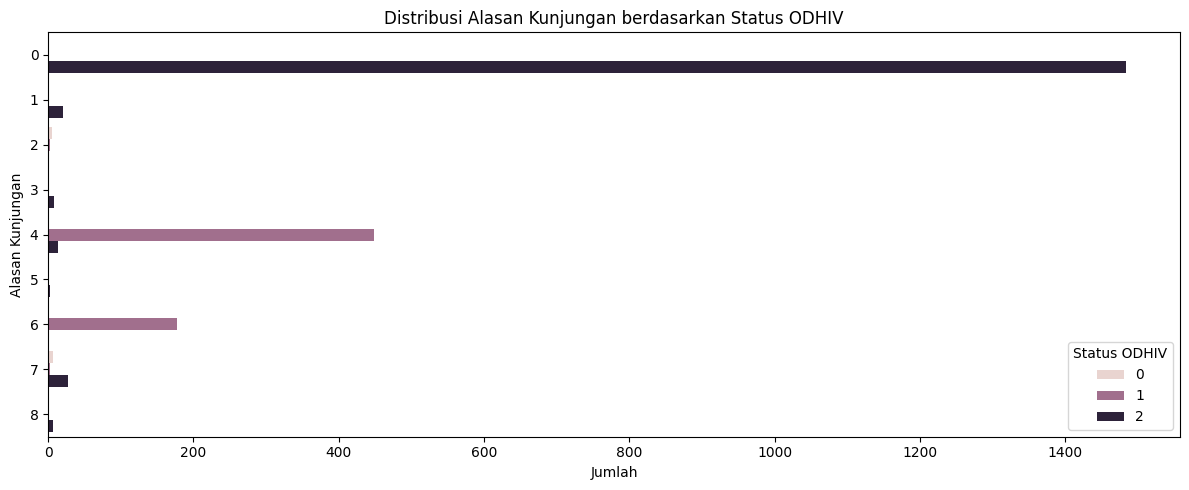

In [121]:
# Visualisasi Alasan Kunjungan
plt.figure(figsize=(12, 5))
sns.countplot(data=data, y='Alasan Kunjungan', hue='Status ODHIV')
plt.title('Distribusi Alasan Kunjungan berdasarkan Status ODHIV')
plt.xlabel('Jumlah')
plt.ylabel('Alasan Kunjungan')
plt.tight_layout()
plt.show()

In [122]:
# Statistik deskriptif numerik
print("Statistik Deskriptif Umur:")
print(data.groupby('Status ODHIV')['Umur'].describe())

Statistik Deskriptif Umur:
               count       mean        std  min   25%   50%    75%   max
Status ODHIV                                                            
0               12.0   7.000000  13.544539  0.0   0.0   0.0   5.25  41.0
1              631.0  40.578447  17.978906  0.0  27.0  39.0  55.00  81.0
2             1562.0  37.705506  10.778372  2.0  31.0  38.0  45.00  75.0


In [123]:
# Tabel kontingensi untuk variabel kategorikal
print("Tabel Kontingensi Jenis Kelamin vs Status ODHIV:")
print(pd.crosstab(data['Jenis Kelamin'], data['Status ODHIV'], margins=True))

print("\nTabel Kontingensi Kelompok Populasi vs Status ODHIV:")
print(pd.crosstab(data['Kelompok Populasi'], data['Status ODHIV'], margins=True))

print("\nTabel Kontingensi Alasan Kunjungan vs Status ODHIV:")
print(pd.crosstab(data['Alasan Kunjungan'], data['Status ODHIV'], margins=True))

Tabel Kontingensi Jenis Kelamin vs Status ODHIV:
Status ODHIV    0    1     2   All
Jenis Kelamin                     
0               8  246  1127  1381
1               4  385   435   824
All            12  631  1562  2205

Tabel Kontingensi Kelompok Populasi vs Status ODHIV:
Status ODHIV        0    1     2   All
Kelompok Populasi                     
0                   0    1     1     2
1                   0    0    12    12
2                   0    5     1     6
3                   0    1     0     1
4                   0  188    14   202
5                   0    0     1     1
6                   0    0   223   223
7                   0    0     1     1
8                   0    0     3     3
9                   0    0    26    26
10                  0    0     4     4
11                  0    0     1     1
12                  0    0     1     1
13                  0    0     6     6
14                  0    0    61    61
15                  0    0     1     1
16                  

# **Feature Selection**

In [124]:
features = ['Umur', 'Jenis Kelamin', 'Kelompok Populasi', 'Alasan Kunjungan']
X = data[features]
y = data['Status ODHIV']

# Pembahasan

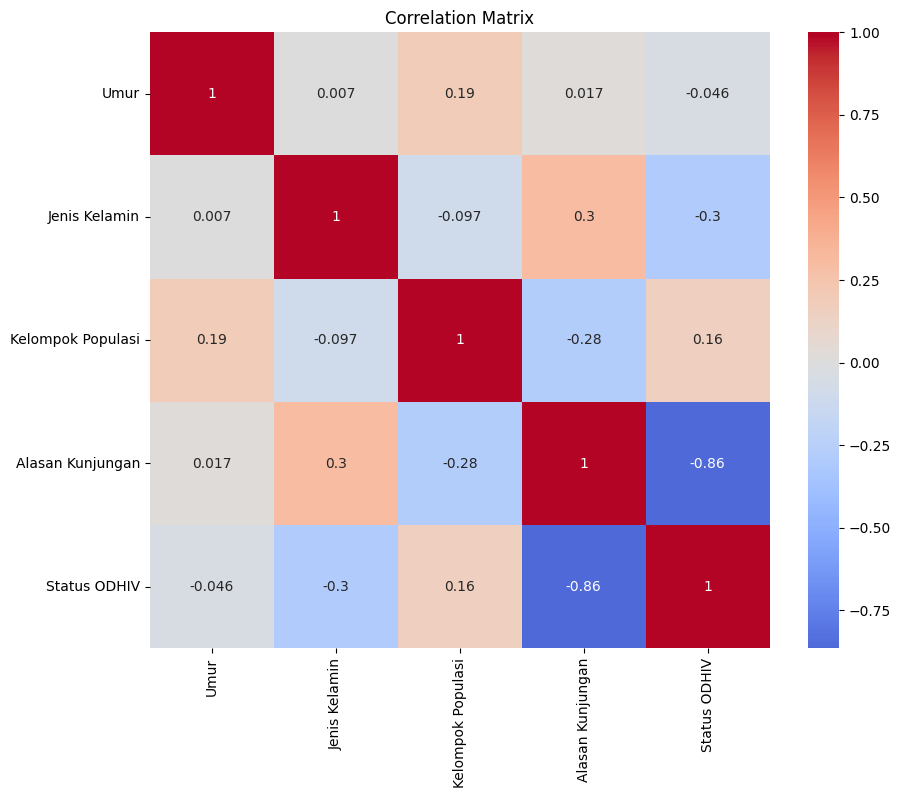

In [125]:
# Visualisasi korelasi antar fitur
plt.figure(figsize=(10, 8))
correlation_matrix = data[features + ['Status ODHIV']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# **Standarisasi Data**

In [126]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **SPLITTING DATA**

# **Train Test Split**

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

print("Distribusi Training set sebelum SMOTETomek:")
print(y_train.value_counts())
print("\nDistribusi Test set:")
print(y_test.value_counts())

print("Jumlah data keseluruhan (X):", X_scaled.shape[0])
print("Jumlah data keseluruhan (y):", len(y))

print("\nJumlah data training (X_train):", X_train.shape[0])
print("Jumlah data training (y_train):", len(y_train))

print("\nJumlah data testing (X_test):", X_test.shape[0])
print("Jumlah data testing (y_test):", len(y_test))

Distribusi Training set sebelum SMOTETomek:
Status ODHIV
2    1249
1     505
0      10
Name: count, dtype: int64

Distribusi Test set:
Status ODHIV
2    313
1    126
0      2
Name: count, dtype: int64
Jumlah data keseluruhan (X): 2205
Jumlah data keseluruhan (y): 2205

Jumlah data training (X_train): 1764
Jumlah data training (y_train): 1764

Jumlah data testing (X_test): 441
Jumlah data testing (y_test): 441


# **PENGANAN DATA TIDAK SEIMBANG**

# **SMOTETomek**

In [128]:
smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=100)
X_train_balanced, y_train_balanced = smote_tomek.fit_resample(X_train, y_train)

print("\nDistribusi setelah SMOTETomek:")
print(pd.Series(y_train_balanced).value_counts())


Distribusi setelah SMOTETomek:
Status ODHIV
1    1249
2    1246
0    1246
Name: count, dtype: int64


# **PEMODELAN KNN**

# **Optimasi Parameter**

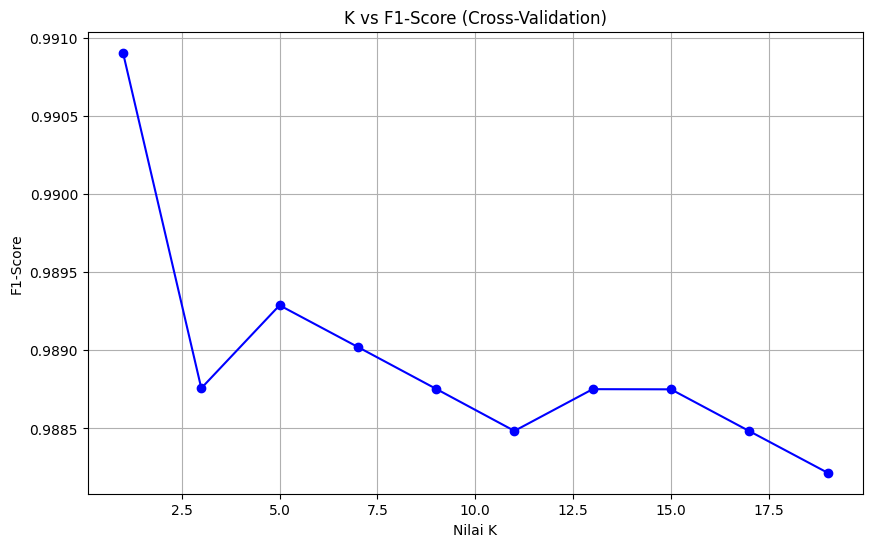


K optimal = 1 dengan F1-score: 0.9909


In [129]:
k_range = range(1, 21, 2)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,
                              weights='distance',
                              metric='manhattan',  # Mencoba metric manhattan
                              algorithm='auto')
    scores = cross_val_score(knn, X_train_balanced, y_train_balanced,
                            cv=5, scoring='f1_weighted')
    cv_scores.append(scores.mean())

# Plot K selection
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, 'bo-')
plt.xlabel('Nilai K')
plt.ylabel('F1-Score')
plt.title('K vs F1-Score (Cross-Validation)')
plt.grid(True)
plt.show()

# Pilih K optimal
optimal_k = k_range[np.argmax(cv_scores)]
print(f'\nK optimal = {optimal_k} dengan F1-score: {max(cv_scores):.4f}')

# **Model Training**

In [130]:
final_knn = KNeighborsClassifier(n_neighbors=optimal_k,
                                weights='distance',
                                metric='manhattan',
                                algorithm='auto')
final_knn.fit(X_train_balanced, y_train_balanced)

# Tambahkan evaluasi pada data training
y_train_pred = final_knn.predict(X_train_balanced)
print("\nPerforma pada data training:")
print(classification_report(y_train_balanced, y_train_pred))


Performa pada data training:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1246
           1       1.00      1.00      1.00      1249
           2       1.00      1.00      1.00      1246

    accuracy                           1.00      3741
   macro avg       1.00      1.00      1.00      3741
weighted avg       1.00      1.00      1.00      3741



# Pembahasan

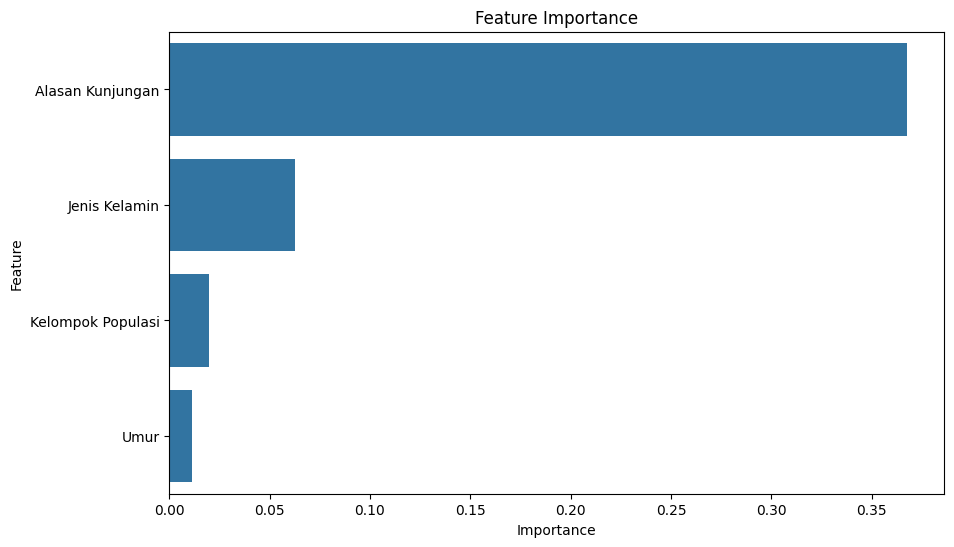

In [131]:
# Analisis feature importance menggunakan absolute weights
from sklearn.inspection import permutation_importance

result = permutation_importance(final_knn, X_test, y_test, n_repeats=10, random_state=42)
importance = pd.DataFrame({
    'Feature': features,
    'Importance': result.importances_mean
})
importance = importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()

In [132]:
# Analisis kasus-kasus kesalahan prediksi
error_cases = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': final_knn.predict(X_test),
    'Correct': y_test.values == final_knn.predict(X_test)
})

error_analysis = pd.concat([
    pd.DataFrame(X_test, columns=features),
    error_cases
], axis=1)

print("Analisis kasus salah prediksi:")
print(error_analysis[~error_analysis['Correct']].groupby(['Actual', 'Predicted']).size())

Analisis kasus salah prediksi:
Actual  Predicted
1       2            1
2       0            3
        1            5
dtype: int64


In [133]:
# Evaluasi pada data testing
y_test_pred = final_knn.predict(X_test)
print("\nPerforma pada data testing:")
print(classification_report(y_test, y_test_pred))


Performa pada data testing:
              precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       0.96      0.99      0.98       126
           2       1.00      0.97      0.99       313

    accuracy                           0.98       441
   macro avg       0.79      0.99      0.84       441
weighted avg       0.98      0.98      0.98       441



# **EVALUASI MODEL**

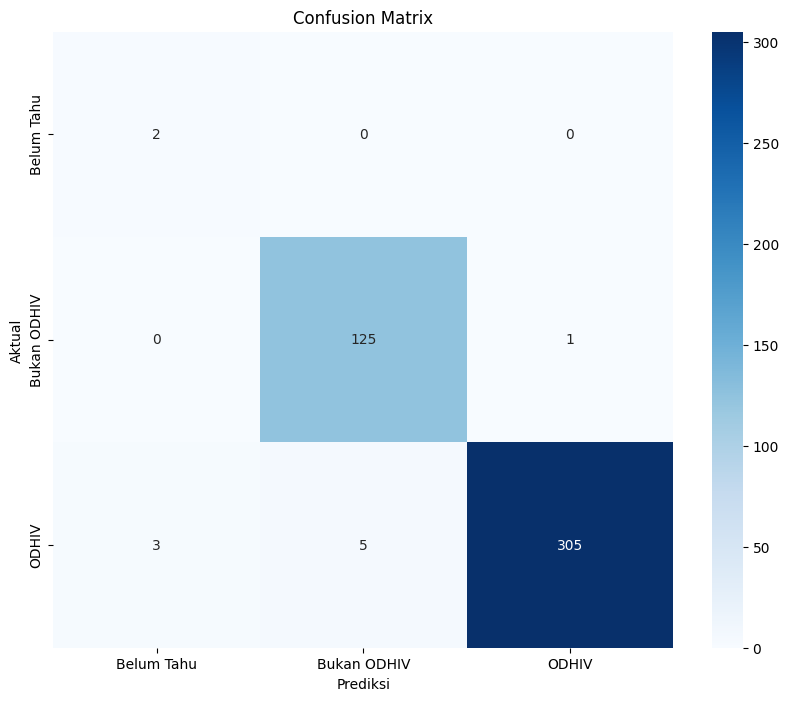


Classification Report pada test set:
              precision    recall  f1-score   support

  Belum Tahu       0.40      1.00      0.57         2
 Bukan ODHIV       0.96      0.99      0.98       126
       ODHIV       1.00      0.97      0.99       313

    accuracy                           0.98       441
   macro avg       0.79      0.99      0.84       441
weighted avg       0.98      0.98      0.98       441



In [134]:
# Prediksi model
y_pred = final_knn.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Belum Tahu', 'Bukan ODHIV', 'ODHIV'],
            yticklabels=['Belum Tahu', 'Bukan ODHIV', 'ODHIV'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print('\nClassification Report pada test set:')
print(classification_report(y_test, y_pred,
                          target_names=['Belum Tahu', 'Bukan ODHIV', 'ODHIV']))

# **Evaluasi Model & visualisasi**

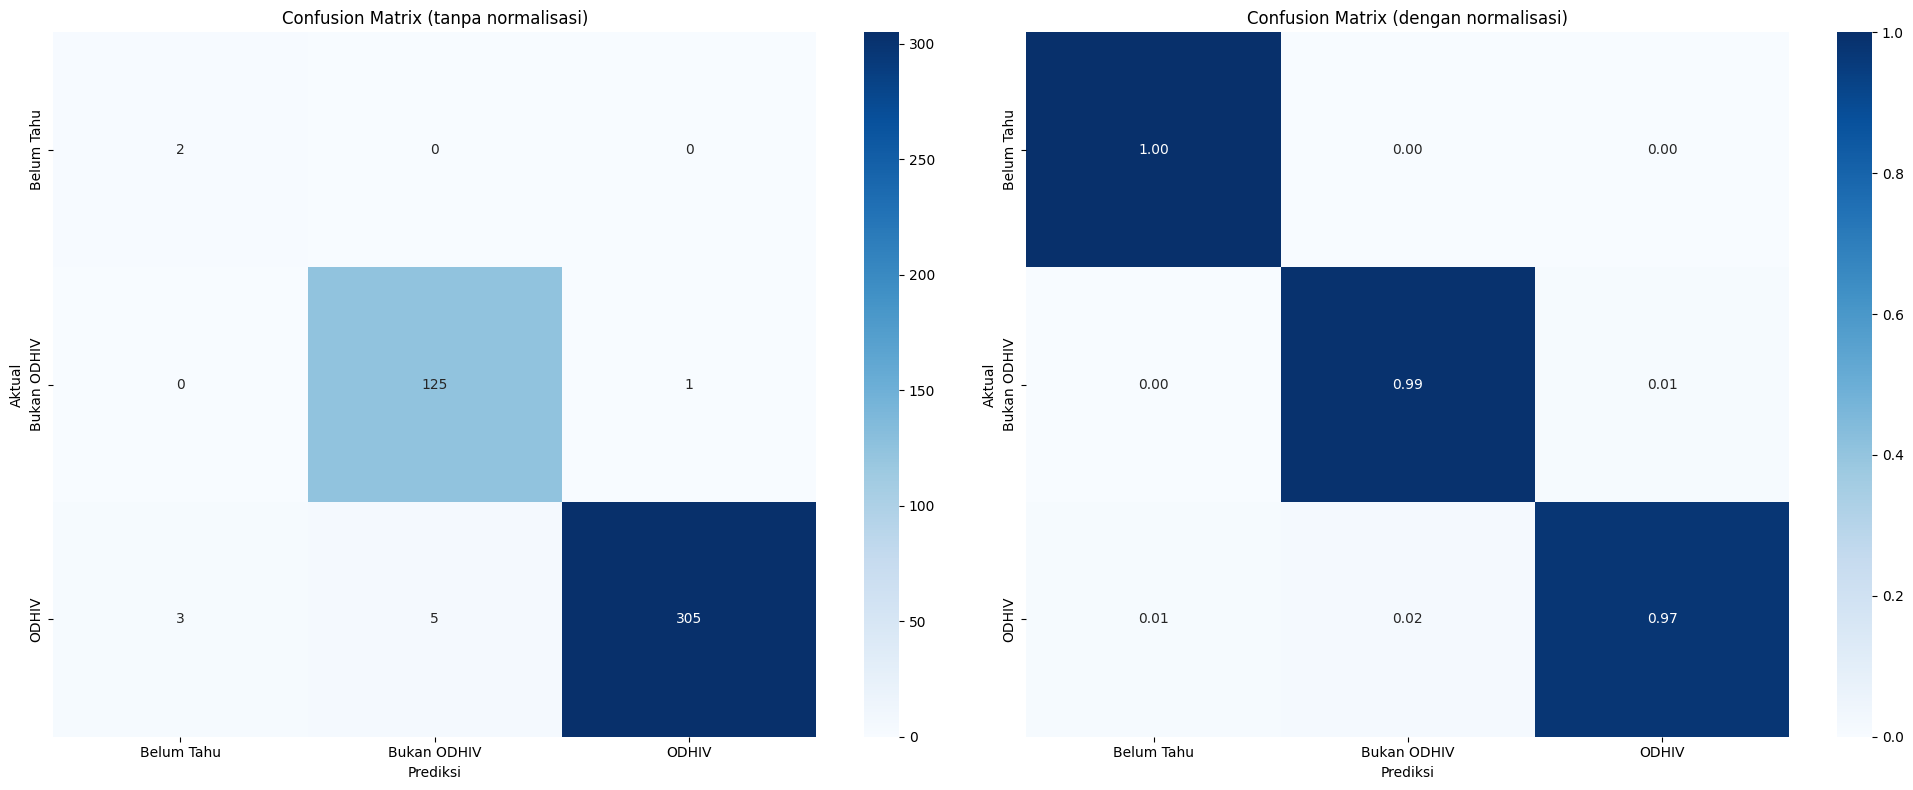


Classification Report pada test set:
              precision    recall  f1-score   support

  Belum Tahu       0.40      1.00      0.57         2
 Bukan ODHIV       0.96      0.99      0.98       126
       ODHIV       1.00      0.97      0.99       313

    accuracy                           0.98       441
   macro avg       0.79      0.99      0.84       441
weighted avg       0.98      0.98      0.98       441



In [135]:
# Prediksi model
y_pred = final_knn.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot dua confusion matrix (normal dan normalized)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot confusion matrix tanpa normalisasi
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Belum Tahu', 'Bukan ODHIV', 'ODHIV'],
            yticklabels=['Belum Tahu', 'Bukan ODHIV', 'ODHIV'],
            ax=ax1)
ax1.set_xlabel('Prediksi')
ax1.set_ylabel('Aktual')
ax1.set_title('Confusion Matrix (tanpa normalisasi)')

# Plot confusion matrix dengan normalisasi
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Belum Tahu', 'Bukan ODHIV', 'ODHIV'],
            yticklabels=['Belum Tahu', 'Bukan ODHIV', 'ODHIV'],
            ax=ax2)
ax2.set_xlabel('Prediksi')
ax2.set_ylabel('Aktual')
ax2.set_title('Confusion Matrix (dengan normalisasi)')

plt.tight_layout()
plt.show()

# Classification Report
print('\nClassification Report pada test set:')
print(classification_report(y_test, y_pred,
                          target_names=['Belum Tahu', 'Bukan ODHIV', 'ODHIV']))


Hasil 5-Fold Cross Validation:
Accuracy scores: [0.98931909 0.98395722 0.9959893  0.98930481 0.9959893 ]
Mean CV Accuracy: 0.9909 (+/- 0.0092)


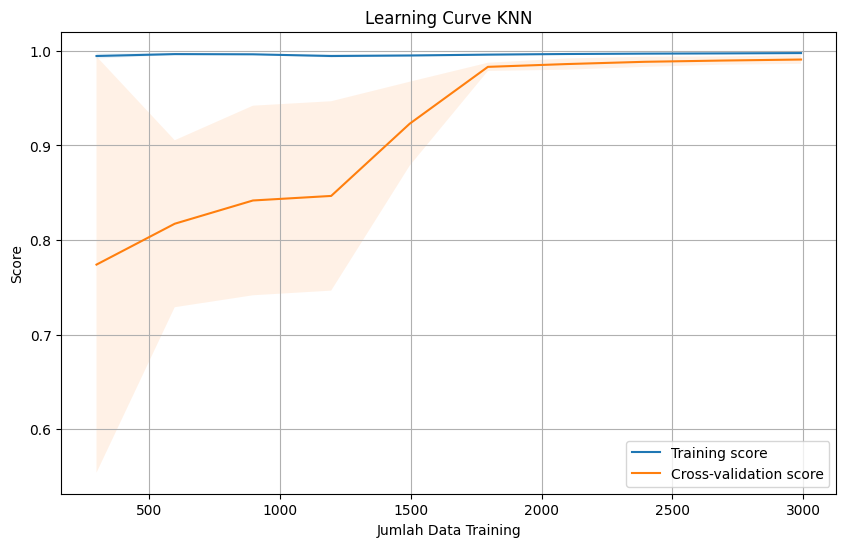

In [136]:
# K-Fold Cross Validation untuk validasi model
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(final_knn, X_train_balanced, y_train_balanced, cv=5)
print("\nHasil 5-Fold Cross Validation:")
print(f"Accuracy scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Learning Curve untuk menganalisis overfitting
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    final_knn, X_train_balanced, y_train_balanced,
    cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Jumlah Data Training')
plt.ylabel('Score')
plt.title('Learning Curve KNN')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [137]:
from sklearn.metrics import classification_report

# Evaluasi pada data testing
y_test_pred = final_knn.predict(X_test)
report = classification_report(y_test, y_test_pred, target_names=['Belum Tahu', 'Bukan ODHIV', 'ODHIV'], output_dict=True)

# Ekstrak metrik dan konversi ke persentase
accuracy = report['accuracy'] * 100
macro_avg_precision = report['macro avg']['precision'] * 100
macro_avg_recall = report['macro avg']['recall'] * 100
macro_avg_f1 = report['macro avg']['f1-score'] * 100


print(f"Accuracy: {accuracy:.2f}%")
print(f"Macro Average Precision: {macro_avg_precision:.2f}%")
print(f"Macro Average Recall: {macro_avg_recall:.2f}%")
print(f"Macro Average F1-Score: {macro_avg_f1:.2f}%")

Accuracy: 97.96%
Macro Average Precision: 78.61%
Macro Average Recall: 98.88%
Macro Average F1-Score: 84.45%


# **IMPLEMENTASI MODEL**

# **Prediction Function**

In [138]:
def predict_with_confidence(model, scaler, data_point):
    """
    Melakukan prediksi dengan tingkat kepercayaan
    """
    # Scale data
    scaled_data = scaler.transform([data_point])

    # Prediksi dan probabilitas
    pred_class = model.predict(scaled_data)[0]
    probabilities = model.predict_proba(scaled_data)[0]

    # Dapatkan label dan confidence
    labels = ['2', '1', '0']
    confidence = max(probabilities) * 100

    print(f"Prediksi: {labels[pred_class]}")
    print(f"Confidence: {confidence:.2f}%")
    print("\nProbabilitas per kelas:")
    for label, prob in zip(labels, probabilities):
        print(f"{label}: {prob*100:.2f}%")

    return pred_class, confidence

# **Testing Data**

In [139]:
sample = [62, 1, 21, 4]  # [Umur, Jenis Kelamin, Kelompok Populasi, Alasan Kunjungan]
predict_with_confidence(final_knn, scaler, sample)

Prediksi: 1
Confidence: 100.00%

Probabilitas per kelas:
2: 0.00%
1: 100.00%
0: 0.00%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(1, 100.0)

# **Import Model KNN**

In [140]:
import joblib

joblib.dump(final_knn, 'knn_model.pkl')

['knn_model.pkl']

In [141]:
knn_model = joblib.load('knn_model.pkl')

example_data = np.array([[62, 1, 21, 4]])

prediction = knn_model.predict(example_data)
print("Prediction:", prediction)

Prediction: [1]
